#                              House Price Prediction

## Import Liberaries

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

## Load Dataset

In [87]:
data = pd.read_csv('B:\\my_data\\New folder\\train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Handling Data

In [88]:
data = pd.get_dummies(data, columns=['Street'])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_Grvl,Street_Pave
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,0,1
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,0,1
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,0,1
3,4,70,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,0,1
4,5,60,RL,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,8,2007,WD,Normal,175000,0,1
1456,1457,20,RL,85.0,13175,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,0,1
1457,1458,70,RL,66.0,9042,NaN,Reg,Lvl,AllPub,Inside,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0,1
1458,1459,20,RL,68.0,9717,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,4,2010,WD,Normal,142125,0,1


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [90]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
SaleType           0
SaleCondition      0
SalePrice          0
Street_Grvl        0
Street_Pave        0
Length: 82, dtype: int64

In [91]:
features = ['LotArea','Street_Grvl','Street_Pave','GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotRmsAbvGrd']
target = 'SalePrice'

## Splitting data

In [92]:
X = data[features]
y = data[target]

In [93]:
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)


In [94]:
X = pd.DataFrame(X,columns = features)
X.isnull().sum()

LotArea         0
Street_Grvl     0
Street_Pave     0
GrLivArea       0
BedroomAbvGr    0
FullBath        0
YearBuilt       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
TotRmsAbvGrd    0
dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8 , random_state = 42)

In [96]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

## model performance

In [98]:
print('score=',format (model.score(X_test,y_test)))

score= 0.7559692482770974


## Plotting 

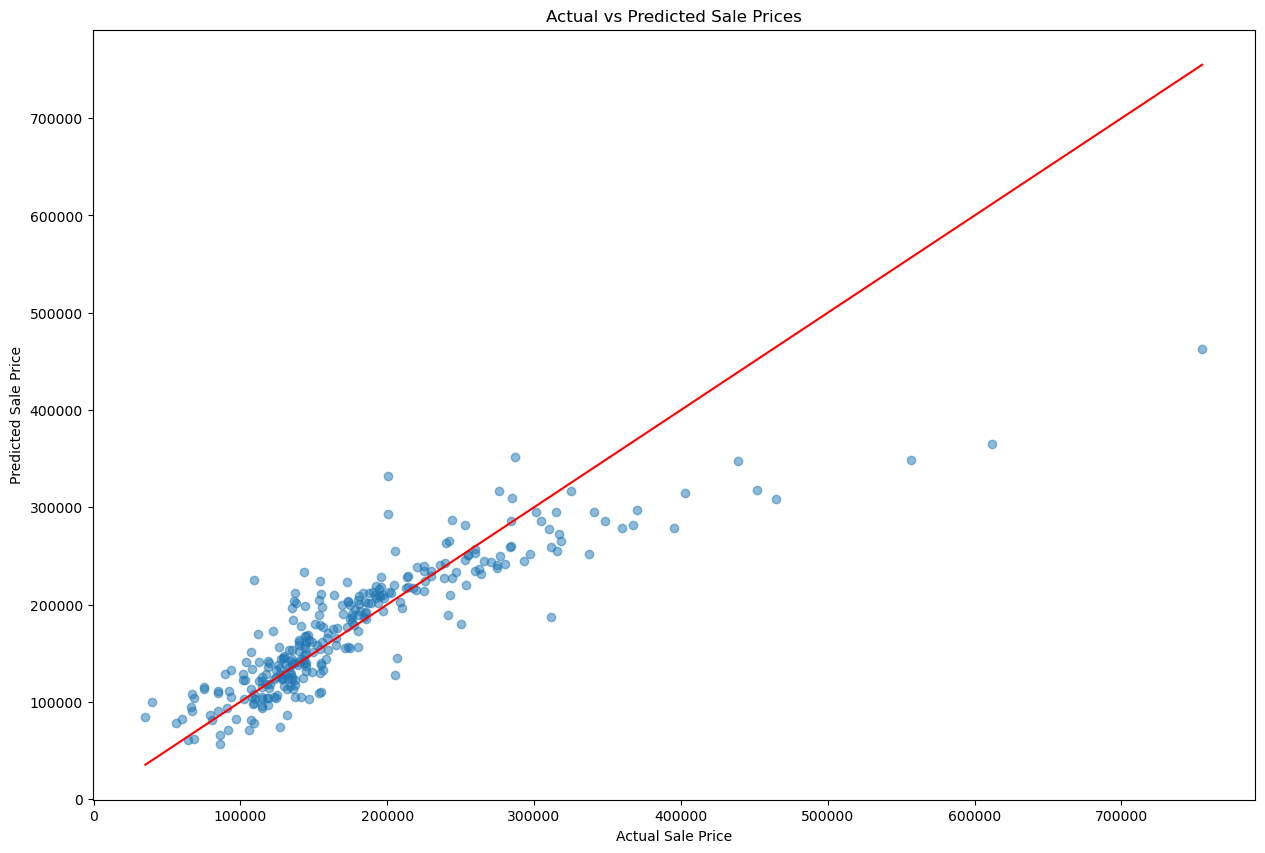

In [99]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, alpha = 0.5,)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r')
plt.show()